In [11]:
import quantiacsToolbox
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
%matplotlib inline

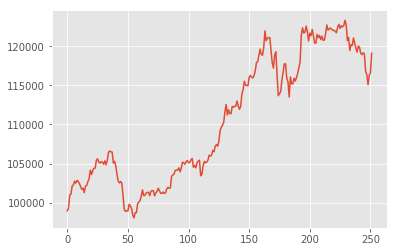

In [12]:
# British pound
F_BP = pd.read_csv('./tickerData/F_BP.txt')
CLOSE = np.array(F_BP.loc[:252-1, [' CLOSE']])
plt.plot(CLOSE)

In [13]:
poly = PolynomialFeatures(degree=5)
X = poly.fit_transform(np.arange(252).reshape(-1, 1))
y = CLOSE[:]

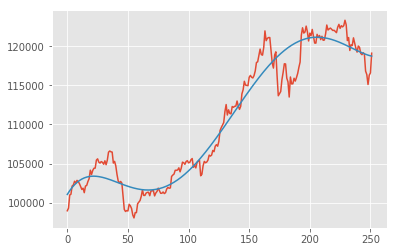

In [14]:
reg = Ridge(alpha=1.0)
reg.fit(X, y)
plt.plot(y)
plt.plot(reg.predict(X))

In [15]:
reg.predict(poly.fit_transform(np.array([[252]])))

array([[118688.64932008]])

In [16]:
F_BP.loc[252, [' CLOSE']]

 CLOSE    119337.5
Name: 252, dtype: float64

In [65]:
class myStrategy(object):
    print('----',CLOSE.shape)
    def myTradingSystem(self, DATE, OPEN, HIGH, LOW, CLOSE, VOL, OI, P, R, RINFO, exposure, equity, settings):
        """ This system uses linear regression to allocate capital into the desired equities"""
     
        # Get parameters from setting
        nMarkets = len(settings['markets'])
        lookback = settings['lookback']
        dimension = settings['dimension']
        threshold = settings['threshold']
        iteration =  settings['iteration']
        iteration +=1
        print(CLOSE.shape)
        print(iteration)
            
        pos = np.zeros(nMarkets, dtype=np.float)

        poly = PolynomialFeatures(degree=dimension)
        for market in range(nMarkets):
            reg = Ridge(alpha=0.01)
            try:
                reg.fit(poly.fit_transform(np.arange(lookback).reshape(-1, 1)), CLOSE[:, market])
                trend = (reg.predict(poly.fit_transform(np.array([[lookback]]))) - CLOSE[-1, market]) / CLOSE[-1, market]

                if abs(trend[0]) < threshold:
                    trend[0] = 0

                pos[market] = np.sign(trend)

            # for NaN data set position to 0
            except ValueError:
                pos[market] = .0

        print(pos)
        return pos, settings


    def mySettings(self):
        """ Define your trading system settings here """
        print('----',CLOSE.shape)
        settings = {}

        # Futures Contracts
        settings['beginInSample'] = '19900101'
        settings['endInSample'] = '20110101'
        
        settings['markets'] = ['F_W']

        settings['lookback'] = 127
        settings['budget'] = 10 ** 6
        settings['slippage'] = 0.05
        settings['iteration'] = 0

        settings['threshold'] = 0.2
        settings['dimension'] = 3

        return settings

('----', (252, 1))


('----', (252, 1))
Loading Data...
Done! 
Evaluating Trading System
(127, 1)
1
[0.]
(127, 1)
1
[0.]
(127, 1)
1
[0.]
(127, 1)
1
[0.]
(127, 1)
1
[0.]
(127, 1)
1
[0.]
(127, 1)
1
[0.]
(127, 1)
1
[0.]
(127, 1)
1
[0.]
(127, 1)
1
[0.]
(127, 1)
1
[0.]
(127, 1)
1
[0.]
(127, 1)
1
[0.]
(127, 1)
1
[0.]
(127, 1)
1
[0.]
(127, 1)
1
[0.]
(127, 1)
1
[0.]
(127, 1)
1
[0.]
(127, 1)
1
[0.]
(127, 1)
1
[0.]
(127, 1)
1
[0.]
(127, 1)
1
[0.]
(127, 1)
1
[0.]
(127, 1)
1
[0.]
(127, 1)
1
[0.]
(127, 1)
1
[0.]
(127, 1)
1
[0.]
(127, 1)
1
[0.]
(127, 1)
1
[0.]
(127, 1)
1
[0.]
(127, 1)
1
[0.]
(127, 1)
1
[0.]
(127, 1)
1
[0.]
(127, 1)
1
[0.]
(127, 1)
1
[0.]
(127, 1)
1
[0.]
(127, 1)
1
[0.]
(127, 1)
1
[0.]
(127, 1)
1
[0.]
(127, 1)
1
[0.]
(127, 1)
1
[0.]
(127, 1)
1
[0.]
(127, 1)
1
[0.]
(127, 1)
1
[0.]
(127, 1)
1
[0.]
(127, 1)
1
[0.]
(127, 1)
1
[0.]
(127, 1)
1
[0.]
(127, 1)
1
[0.]
(127, 1)
1
[0.]
(127, 1)
1
[0.]
(127, 1)
1
[0.]
(127, 1)
1
[0.]
(127, 1)
1
[0.]
(127, 1)
1
[0.]
(127, 1)
1
[0.]
(127, 1)
1
[0.]
(127, 1)
1
[0.]
(12

[0.]
(127, 1)
1
[0.]
(127, 1)
1
[0.]
(127, 1)
1
[0.]
(127, 1)
1
[0.]
(127, 1)
1
[0.]
(127, 1)
1
[0.]
(127, 1)
1
[0.]
(127, 1)
1
[0.]
(127, 1)
1
[0.]
(127, 1)
1
[0.]
(127, 1)
1
[0.]
(127, 1)
1
[0.]
(127, 1)
1
[0.]
(127, 1)
1
[0.]
(127, 1)
1
[0.]
(127, 1)
1
[0.]
(127, 1)
1
[0.]
(127, 1)
1
[0.]
(127, 1)
1
[0.]
(127, 1)
1
[0.]
(127, 1)
1
[0.]
(127, 1)
1
[0.]
(127, 1)
1
[0.]
(127, 1)
1
[0.]
(127, 1)
1
[0.]
(127, 1)
1
[0.]
(127, 1)
1
[0.]
(127, 1)
1
[0.]
(127, 1)
1
[0.]
(127, 1)
1
[0.]
(127, 1)
1
[0.]
(127, 1)
1
[0.]
(127, 1)
1
[0.]
(127, 1)
1
[0.]
(127, 1)
1
[0.]
(127, 1)
1
[0.]
(127, 1)
1
[0.]
(127, 1)
1
[0.]
(127, 1)
1
[0.]
(127, 1)
1
[0.]
(127, 1)
1
[0.]
(127, 1)
1
[0.]
(127, 1)
1
[0.]
(127, 1)
1
[0.]
(127, 1)
1
[0.]
(127, 1)
1
[0.]
(127, 1)
1
[0.]
(127, 1)
1
[0.]
(127, 1)
1
[0.]
(127, 1)
1
[0.]
(127, 1)
1
[0.]
(127, 1)
1
[0.]
(127, 1)
1
[0.]
(127, 1)
1
[0.]
(127, 1)
1
[0.]
(127, 1)
1
[0.]
(127, 1)
1
[0.]
(127, 1)
1
[0.]
(127, 1)
1
[0.]
(127, 1)
1
[0.]
(127, 1)
1
[0.]
(127, 1)
1
[0.]
(12

[0.]
(127, 1)
1
[0.]
(127, 1)
1
[0.]
(127, 1)
1
[0.]
(127, 1)
1
[0.]
(127, 1)
1
[0.]
(127, 1)
1
[0.]
(127, 1)
1
[0.]
(127, 1)
1
[0.]
(127, 1)
1
[0.]
(127, 1)
1
[0.]
(127, 1)
1
[0.]
(127, 1)
1
[0.]
(127, 1)
1
[0.]
(127, 1)
1
[0.]
(127, 1)
1
[0.]
(127, 1)
1
[0.]
(127, 1)
1
[0.]
(127, 1)
1
[0.]
(127, 1)
1
[0.]
(127, 1)
1
[0.]
(127, 1)
1
[0.]
(127, 1)
1
[0.]
(127, 1)
1
[0.]
(127, 1)
1
[0.]
(127, 1)
1
[0.]
(127, 1)
1
[0.]
(127, 1)
1
[0.]
(127, 1)
1
[0.]
(127, 1)
1
[0.]
(127, 1)
1
[0.]
(127, 1)
1
[0.]
(127, 1)
1
[0.]
(127, 1)
1
[0.]
(127, 1)
1
[0.]
(127, 1)
1
[0.]
(127, 1)
1
[0.]
(127, 1)
1
[0.]
(127, 1)
1
[0.]
(127, 1)
1
[0.]
(127, 1)
1
[0.]
(127, 1)
1
[0.]
(127, 1)
1
[0.]
(127, 1)
1
[0.]
(127, 1)
1
[0.]
(127, 1)
1
[0.]
(127, 1)
1
[0.]
(127, 1)
1
[0.]
(127, 1)
1
[0.]
(127, 1)
1
[0.]
(127, 1)
1
[0.]
(127, 1)
1
[0.]
(127, 1)
1
[0.]
(127, 1)
1
[0.]
(127, 1)
1
[0.]
(127, 1)
1
[0.]
(127, 1)
1
[0.]
(127, 1)
1
[0.]
(127, 1)
1
[0.]
(127, 1)
1
[0.]
(127, 1)
1
[0.]
(127, 1)
1
[0.]
(127, 1)
1
[0.]
(12

(127, 1)
1
[0.]
(127, 1)
1
[0.]
(127, 1)
1
[0.]
(127, 1)
1
[0.]
(127, 1)
1
[0.]
(127, 1)
1
[0.]
(127, 1)
1
[0.]
(127, 1)
1
[0.]
(127, 1)
1
[0.]
(127, 1)
1
[0.]
(127, 1)
1
[0.]
(127, 1)
1
[0.]
(127, 1)
1
[0.]
(127, 1)
1
[0.]
(127, 1)
1
[0.]
(127, 1)
1
[0.]
(127, 1)
1
[0.]
(127, 1)
1
[0.]
(127, 1)
1
[0.]
(127, 1)
1
[0.]
(127, 1)
1
[0.]
(127, 1)
1
[0.]
(127, 1)
1
[0.]
(127, 1)
1
[0.]
(127, 1)
1
[0.]
(127, 1)
1
[0.]
(127, 1)
1
[0.]
(127, 1)
1
[0.]
(127, 1)
1
[0.]
(127, 1)
1
[0.]
(127, 1)
1
[0.]
(127, 1)
1
[0.]
(127, 1)
1
[0.]
(127, 1)
1
[0.]
(127, 1)
1
[0.]
(127, 1)
1
[0.]
(127, 1)
1
[0.]
(127, 1)
1
[0.]
(127, 1)
1
[0.]
(127, 1)
1
[0.]
(127, 1)
1
[0.]
(127, 1)
1
[0.]
(127, 1)
1
[0.]
(127, 1)
1
[0.]
(127, 1)
1
[0.]
(127, 1)
1
[0.]
(127, 1)
1
[0.]
(127, 1)
1
[0.]
(127, 1)
1
[0.]
(127, 1)
1
[0.]
(127, 1)
1
[0.]
(127, 1)
1
[0.]
(127, 1)
1
[0.]
(127, 1)
1
[0.]
(127, 1)
1
[0.]
(127, 1)
1
[0.]
(127, 1)
1
[0.]
(127, 1)
1
[0.]
(127, 1)
1
[0.]
(127, 1)
1
[0.]
(127, 1)
1
[0.]
(127, 1)
1
[0.]
(127, 1)

[0.]
(127, 1)
1
[0.]
(127, 1)
1
[0.]
(127, 1)
1
[0.]
(127, 1)
1
[0.]
(127, 1)
1
[0.]
(127, 1)
1
[0.]
(127, 1)
1
[0.]
(127, 1)
1
[0.]
(127, 1)
1
[0.]
(127, 1)
1
[0.]
(127, 1)
1
[0.]
(127, 1)
1
[0.]
(127, 1)
1
[0.]
(127, 1)
1
[0.]
(127, 1)
1
[0.]
(127, 1)
1
[0.]
(127, 1)
1
[0.]
(127, 1)
1
[0.]
(127, 1)
1
[0.]
(127, 1)
1
[0.]
(127, 1)
1
[0.]
(127, 1)
1
[0.]
(127, 1)
1
[0.]
(127, 1)
1
[0.]
(127, 1)
1
[0.]
(127, 1)
1
[0.]
(127, 1)
1
[0.]
(127, 1)
1
[0.]
(127, 1)
1
[0.]
(127, 1)
1
[0.]
(127, 1)
1
[0.]
(127, 1)
1
[0.]
(127, 1)
1
[0.]
(127, 1)
1
[0.]
(127, 1)
1
[0.]
(127, 1)
1
[0.]
(127, 1)
1
[0.]
(127, 1)
1
[0.]
(127, 1)
1
[0.]
(127, 1)
1
[0.]
(127, 1)
1
[0.]
(127, 1)
1
[0.]
(127, 1)
1
[0.]
(127, 1)
1
[0.]
(127, 1)
1
[0.]
(127, 1)
1
[0.]
(127, 1)
1
[0.]
(127, 1)
1
[0.]
(127, 1)
1
[0.]
(127, 1)
1
[0.]
(127, 1)
1
[0.]
(127, 1)
1
[0.]
(127, 1)
1
[0.]
(127, 1)
1
[0.]
(127, 1)
1
[0.]
(127, 1)
1
[0.]
(127, 1)
1
[0.]
(127, 1)
1
[0.]
(127, 1)
1
[0.]
(127, 1)
1
[0.]
(127, 1)
1
[0.]
(127, 1)
1
[0.]
(12

[0.]
(127, 1)
1
[0.]
(127, 1)
1
[0.]
(127, 1)
1
[0.]
(127, 1)
1
[0.]
(127, 1)
1
[0.]
(127, 1)
1
[0.]
(127, 1)
1
[0.]
(127, 1)
1
[0.]
(127, 1)
1
[0.]
(127, 1)
1
[0.]
(127, 1)
1
[0.]
(127, 1)
1
[0.]
(127, 1)
1
[0.]
(127, 1)
1
[0.]
(127, 1)
1
[0.]
(127, 1)
1
[0.]
(127, 1)
1
[0.]
(127, 1)
1
[0.]
(127, 1)
1
[0.]
(127, 1)
1
[0.]
(127, 1)
1
[0.]
(127, 1)
1
[0.]
(127, 1)
1
[0.]
(127, 1)
1
[0.]
(127, 1)
1
[0.]
(127, 1)
1
[0.]
(127, 1)
1
[0.]
(127, 1)
1
[0.]
(127, 1)
1
[0.]
(127, 1)
1
[0.]
(127, 1)
1
[0.]
(127, 1)
1
[0.]
(127, 1)
1
[0.]
(127, 1)
1
[0.]
(127, 1)
1
[0.]
(127, 1)
1
[0.]
(127, 1)
1
[0.]
(127, 1)
1
[0.]
(127, 1)
1
[0.]
(127, 1)
1
[0.]
(127, 1)
1
[0.]
(127, 1)
1
[0.]
(127, 1)
1
[0.]
(127, 1)
1
[0.]
(127, 1)
1
[0.]
(127, 1)
1
[0.]
(127, 1)
1
[0.]
(127, 1)
1
[0.]
(127, 1)
1
[0.]
(127, 1)
1
[0.]
(127, 1)
1
[0.]
(127, 1)
1
[0.]
(127, 1)
1
[0.]
(127, 1)
1
[0.]
(127, 1)
1
[0.]
(127, 1)
1
[0.]
(127, 1)
1
[0.]
(127, 1)
1
[0.]
(127, 1)
1
[0.]
(127, 1)
1
[0.]
(127, 1)
1
[0.]
(127, 1)
1
[0.]
(12

(127, 1)
1
[0.]
(127, 1)
1
[0.]
(127, 1)
1
[0.]
(127, 1)
1
[0.]
(127, 1)
1
[0.]
(127, 1)
1
[0.]
(127, 1)
1
[0.]
(127, 1)
1
[0.]
(127, 1)
1
[0.]
(127, 1)
1
[0.]
(127, 1)
1
[0.]
(127, 1)
1
[0.]
(127, 1)
1
[0.]
(127, 1)
1
[0.]
(127, 1)
1
[0.]
(127, 1)
1
[0.]
(127, 1)
1
[0.]
(127, 1)
1
[0.]
(127, 1)
1
[0.]
(127, 1)
1
[0.]
(127, 1)
1
[0.]
(127, 1)
1
[0.]
(127, 1)
1
[0.]
(127, 1)
1
[0.]
(127, 1)
1
[0.]
(127, 1)
1
[0.]
(127, 1)
1
[0.]
(127, 1)
1
[0.]
(127, 1)
1
[0.]
(127, 1)
1
[0.]
(127, 1)
1
[0.]
(127, 1)
1
[0.]
(127, 1)
1
[0.]
(127, 1)
1
[0.]
(127, 1)
1
[0.]
(127, 1)
1
[0.]
(127, 1)
1
[0.]
(127, 1)
1
[0.]
(127, 1)
1
[0.]
(127, 1)
1
[0.]
(127, 1)
1
[0.]
(127, 1)
1
[0.]
(127, 1)
1
[0.]
(127, 1)
1
[0.]
(127, 1)
1
[0.]
(127, 1)
1
[0.]
(127, 1)
1
[0.]
(127, 1)
1
[0.]
(127, 1)
1
[0.]
(127, 1)
1
[0.]
(127, 1)
1
[0.]
(127, 1)
1
[0.]
(127, 1)
1
[0.]
(127, 1)
1
[0.]
(127, 1)
1
[0.]
(127, 1)
1
[0.]
(127, 1)
1
[0.]
(127, 1)
1
[0.]
(127, 1)
1
[0.]
(127, 1)
1
[0.]
(127, 1)
1
[0.]
(127, 1)
1
[0.]
(127, 1)

(127, 1)
1
[0.]
(127, 1)
1
[0.]
(127, 1)
1
[0.]
(127, 1)
1
[0.]
(127, 1)
1
[0.]
(127, 1)
1
[0.]
(127, 1)
1
[0.]
(127, 1)
1
[0.]
(127, 1)
1
[0.]
(127, 1)
1
[0.]
(127, 1)
1
[0.]
(127, 1)
1
[0.]
(127, 1)
1
[0.]
(127, 1)
1
[0.]
(127, 1)
1
[0.]
(127, 1)
1
[0.]
(127, 1)
1
[0.]
(127, 1)
1
[0.]
(127, 1)
1
[0.]
(127, 1)
1
[0.]
(127, 1)
1
[0.]
(127, 1)
1
[0.]
(127, 1)
1
[0.]
(127, 1)
1
[0.]
(127, 1)
1
[0.]
(127, 1)
1
[0.]
(127, 1)
1
[0.]
(127, 1)
1
[0.]
(127, 1)
1
[0.]
(127, 1)
1
[0.]
(127, 1)
1
[0.]
(127, 1)
1
[0.]
(127, 1)
1
[0.]
(127, 1)
1
[0.]
(127, 1)
1
[0.]
(127, 1)
1
[0.]
(127, 1)
1
[0.]
(127, 1)
1
[0.]
(127, 1)
1
[0.]
(127, 1)
1
[0.]
(127, 1)
1
[0.]
(127, 1)
1
[0.]
(127, 1)
1
[0.]
(127, 1)
1
[0.]
(127, 1)
1
[0.]
(127, 1)
1
[0.]
(127, 1)
1
[0.]
(127, 1)
1
[0.]
(127, 1)
1
[0.]
(127, 1)
1
[0.]
(127, 1)
1
[0.]
(127, 1)
1
[0.]
(127, 1)
1
[0.]
(127, 1)
1
[0.]
(127, 1)
1
[0.]
(127, 1)
1
[0.]
(127, 1)
1
[0.]
(127, 1)
1
[0.]
(127, 1)
1
[0.]
(127, 1)
1
[0.]
(127, 1)
1
[0.]
(127, 1)
1
[0.]
(127, 1)

(127, 1)
1
[0.]
(127, 1)
1
[0.]
(127, 1)
1
[0.]
(127, 1)
1
[0.]
(127, 1)
1
[0.]
(127, 1)
1
[0.]
(127, 1)
1
[0.]
(127, 1)
1
[0.]
(127, 1)
1
[0.]
(127, 1)
1
[0.]
(127, 1)
1
[0.]
(127, 1)
1
[0.]
(127, 1)
1
[0.]
(127, 1)
1
[0.]
(127, 1)
1
[0.]
(127, 1)
1
[0.]
(127, 1)
1
[0.]
(127, 1)
1
[0.]
(127, 1)
1
[0.]
(127, 1)
1
[0.]
(127, 1)
1
[0.]
(127, 1)
1
[0.]
(127, 1)
1
[0.]
(127, 1)
1
[0.]
(127, 1)
1
[0.]
(127, 1)
1
[0.]
(127, 1)
1
[0.]
(127, 1)
1
[0.]
(127, 1)
1
[0.]
(127, 1)
1
[0.]
(127, 1)
1
[0.]
(127, 1)
1
[0.]
(127, 1)
1
[0.]
(127, 1)
1
[0.]
(127, 1)
1
[0.]
(127, 1)
1
[0.]
(127, 1)
1
[0.]
(127, 1)
1
[0.]
(127, 1)
1
[0.]
(127, 1)
1
[0.]
(127, 1)
1
[0.]
(127, 1)
1
[0.]
(127, 1)
1
[0.]
(127, 1)
1
[0.]
(127, 1)
1
[0.]
(127, 1)
1
[0.]
(127, 1)
1
[0.]
(127, 1)
1
[0.]
(127, 1)
1
[0.]
(127, 1)
1
[0.]
(127, 1)
1
[0.]
(127, 1)
1
[0.]
(127, 1)
1
[0.]
(127, 1)
1
[0.]
(127, 1)
1
[0.]
(127, 1)
1
[0.]
(127, 1)
1
[0.]
(127, 1)
1
[0.]
(127, 1)
1
[0.]
(127, 1)
1
[0.]
(127, 1)
1
[0.]
(127, 1)
1
[0.]
(127, 1)

[0.]
(127, 1)
1
[0.]
(127, 1)
1
[0.]
(127, 1)
1
[0.]
(127, 1)
1
[0.]
(127, 1)
1
[0.]
(127, 1)
1
[0.]
(127, 1)
1
[0.]
(127, 1)
1
[0.]
(127, 1)
1
[0.]
(127, 1)
1
[0.]
(127, 1)
1
[0.]
(127, 1)
1
[0.]
(127, 1)
1
[0.]
(127, 1)
1
[0.]
(127, 1)
1
[0.]
(127, 1)
1
[0.]
(127, 1)
1
[0.]
(127, 1)
1
[0.]
(127, 1)
1
[0.]
(127, 1)
1
[0.]
(127, 1)
1
[0.]
(127, 1)
1
[0.]
(127, 1)
1
[0.]
(127, 1)
1
[0.]
(127, 1)
1
[0.]
(127, 1)
1
[0.]
(127, 1)
1
[0.]
(127, 1)
1
[0.]
(127, 1)
1
[0.]
(127, 1)
1
[0.]
(127, 1)
1
[0.]
(127, 1)
1
[0.]
(127, 1)
1
[0.]
(127, 1)
1
[0.]
(127, 1)
1
[0.]
(127, 1)
1
[0.]
(127, 1)
1
[0.]
(127, 1)
1
[0.]
(127, 1)
1
[0.]
(127, 1)
1
[0.]
(127, 1)
1
[0.]
(127, 1)
1
[0.]
(127, 1)
1
[0.]
(127, 1)
1
[0.]
(127, 1)
1
[0.]
(127, 1)
1
[0.]
(127, 1)
1
[0.]
(127, 1)
1
[0.]
(127, 1)
1
[0.]
(127, 1)
1
[0.]
(127, 1)
1
[0.]
(127, 1)
1
[0.]
(127, 1)
1
[0.]
(127, 1)
1
[0.]
(127, 1)
1
[0.]
(127, 1)
1
[0.]
(127, 1)
1
[0.]
(127, 1)
1
[0.]
(127, 1)
1
[0.]
(127, 1)
1
[0.]
(127, 1)
1
[0.]
(127, 1)
1
[0.]
(12

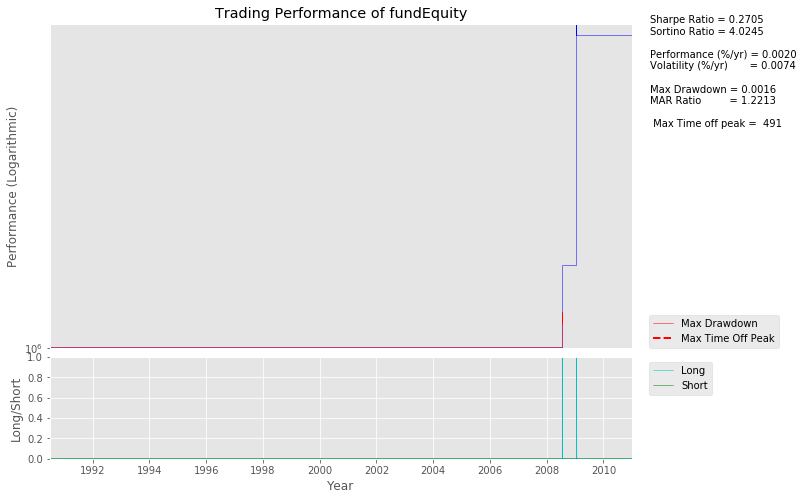

In [66]:
result = quantiacsToolbox.runts(myStrategy)

In [71]:
class myStrategy(object):
    print('----',CLOSE.shape)
    def myTradingSystem(self, DATE, OPEN, HIGH, LOW, CLOSE, VOL, OI, P, R, RINFO, exposure, equity, settings):
        """ This system uses linear regression to allocate capital into the desired equities"""
     
        # Get parameters from setting
        nMarkets = len(settings['markets'])
        lookback = settings['lookback']
        dimension = settings['dimension']
        threshold = settings['threshold']
        iteration =  settings['iteration']
        iteration +=1
        print(CLOSE.shape)
        print(iteration)
            
        pos = np.zeros(nMarkets, dtype=np.float)

        poly = PolynomialFeatures(degree=dimension)
        for market in range(nMarkets):
            reg = Ridge(alpha=0.01)
            try:
                reg.fit(poly.fit_transform(np.arange(lookback).reshape(-1, 1)), CLOSE[:, market])
                trend = (reg.predict(poly.fit_transform(np.array([[lookback]]))) - CLOSE[-1, market]) / CLOSE[-1, market]

                if abs(trend[0]) < threshold:
                    trend[0] = 0

                pos[market] = np.sign(trend)

            # for NaN data set position to 0
            except ValueError:
                pos[market] = .0

        print(pos)
        return pos, settings


    def mySettings(self):
        """ Define your trading system settings here """
        print('----',CLOSE.shape)
        settings = {}

        # Futures Contracts
        settings['beginInSample'] = '20110102'
        settings['endInSample'] = '20180612'
        
        settings['markets'] = ['F_W']

        settings['lookback'] = 504
        settings['budget'] = 10 ** 6
        settings['slippage'] = 0.05
        settings['iteration'] = 0

        settings['threshold'] = 0.2
        settings['dimension'] = 3

        return settings

('----', (252, 1))


('----', (252, 1))
Loading Data...
Done! 
Evaluating Trading System
(504, 1)
1
[1.]
(504, 1)
1
[1.]
(504, 1)
1
[1.]
(504, 1)
1
[1.]
(504, 1)
1
[1.]
(504, 1)
1
[1.]
(504, 1)
1
[0.]
(504, 1)
1
[0.]
(504, 1)
1
[0.]
(504, 1)
1
[0.]
(504, 1)
1
[0.]
(504, 1)
1
[0.]
(504, 1)
1
[0.]
(504, 1)
1
[0.]
(504, 1)
1
[0.]
(504, 1)
1
[0.]
(504, 1)
1
[0.]
(504, 1)
1
[0.]
(504, 1)
1
[0.]
(504, 1)
1
[0.]
(504, 1)
1
[0.]
(504, 1)
1
[0.]
(504, 1)
1
[0.]
(504, 1)
1
[0.]
(504, 1)
1
[0.]
(504, 1)
1
[0.]
(504, 1)
1
[0.]
(504, 1)
1
[0.]
(504, 1)
1
[0.]
(504, 1)
1
[0.]
(504, 1)
1
[0.]
(504, 1)
1
[0.]
(504, 1)
1
[0.]
(504, 1)
1
[0.]
(504, 1)
1
[0.]
(504, 1)
1
[0.]
(504, 1)
1
[0.]
(504, 1)
1
[0.]
(504, 1)
1
[0.]
(504, 1)
1
[0.]
(504, 1)
1
[0.]
(504, 1)
1
[0.]
(504, 1)
1
[0.]
(504, 1)
1
[0.]
(504, 1)
1
[0.]
(504, 1)
1
[0.]
(504, 1)
1
[0.]
(504, 1)
1
[0.]
(504, 1)
1
[0.]
(504, 1)
1
[0.]
(504, 1)
1
[0.]
(504, 1)
1
[0.]
(504, 1)
1
[0.]
(504, 1)
1
[0.]
(504, 1)
1
[0.]
(504, 1)
1
[0.]
(504, 1)
1
[0.]
(504, 1)
1
[0.]
(50

/home/zeyd/anaconda3/envs/py27/lib/python2.7/site-packages/sklearn/linear_model/ridge.py:112: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number1.512700e-20
  overwrite_a=True).T


[0.]
(504, 1)
1
[0.]
(504, 1)
1
[0.]
(504, 1)
1
[0.]
(504, 1)
1
[0.]
(504, 1)
1
[0.]
(504, 1)
1
[0.]
(504, 1)
1
[0.]
(504, 1)
1
[0.]
(504, 1)
1
[0.]
(504, 1)
1
[0.]
(504, 1)
1
[0.]
(504, 1)
1
[0.]
(504, 1)
1
[0.]
(504, 1)
1
[0.]
(504, 1)
1
[0.]
(504, 1)
1
[0.]
(504, 1)
1
[0.]
(504, 1)
1
[0.]
(504, 1)
1
[0.]
(504, 1)
1
[0.]
(504, 1)
1
[0.]
(504, 1)
1
[0.]
(504, 1)
1
[0.]
(504, 1)
1
[0.]
(504, 1)
1
[0.]
(504, 1)
1
[0.]
(504, 1)
1
[0.]
(504, 1)
1
[0.]
(504, 1)
1
[0.]
(504, 1)
1
[0.]
(504, 1)
1
[0.]
(504, 1)
1
[0.]
(504, 1)
1
[0.]
(504, 1)
1
[0.]
(504, 1)
1
[0.]
(504, 1)
1
[0.]
(504, 1)
1
[0.]
(504, 1)
1
[0.]
(504, 1)
1
[0.]
(504, 1)
1
[0.]
(504, 1)
1
[0.]
(504, 1)
1
[0.]
(504, 1)
1
[0.]
(504, 1)
1
[0.]
(504, 1)
1
[0.]
(504, 1)
1
[0.]
(504, 1)
1
[0.]
(504, 1)
1
[0.]
(504, 1)
1
[0.]
(504, 1)
1
[0.]
(504, 1)
1
[0.]
(504, 1)
1
[0.]
(504, 1)
1
[0.]
(504, 1)
1
[0.]
(504, 1)
1
[0.]
(504, 1)
1
[0.]
(504, 1)
1
[0.]
(504, 1)
1
[0.]
(504, 1)
1
[0.]
(504, 1)
1
[0.]
(504, 1)
1
[0.]
(504, 1)
1
[0.]
(50

[0.]
(504, 1)
1
[0.]
(504, 1)
1
[0.]
(504, 1)
1
[0.]
(504, 1)
1
[0.]
(504, 1)
1
[0.]
(504, 1)
1
[0.]
(504, 1)
1
[0.]
(504, 1)
1
[0.]
(504, 1)
1
[0.]
(504, 1)
1
[0.]
(504, 1)
1
[0.]
(504, 1)
1
[0.]
(504, 1)
1
[0.]
(504, 1)
1
[0.]
(504, 1)
1
[0.]
(504, 1)
1
[0.]
(504, 1)
1
[0.]
(504, 1)
1
[0.]
(504, 1)
1
[0.]
(504, 1)
1
[0.]
(504, 1)
1
[0.]
(504, 1)
1
[0.]
(504, 1)
1
[0.]
(504, 1)
1
[0.]
(504, 1)
1
[0.]
(504, 1)
1
[0.]
(504, 1)
1
[0.]
(504, 1)
1
[0.]
(504, 1)
1
[0.]
(504, 1)
1
[0.]
(504, 1)
1
[0.]
(504, 1)
1
[0.]
(504, 1)
1
[0.]
(504, 1)
1
[0.]
(504, 1)
1
[0.]
(504, 1)
1
[0.]
(504, 1)
1
[0.]
(504, 1)
1
[0.]
(504, 1)
1
[0.]
(504, 1)
1
[0.]
(504, 1)
1
[0.]
(504, 1)
1
[0.]
(504, 1)
1
[0.]
(504, 1)
1
[0.]
(504, 1)
1
[0.]
(504, 1)
1
[0.]
(504, 1)
1
[0.]
(504, 1)
1
[0.]
(504, 1)
1
[0.]
(504, 1)
1
[0.]
(504, 1)
1
[0.]
(504, 1)
1
[0.]
(504, 1)
1
[0.]
(504, 1)
1
[0.]
(504, 1)
1
[0.]
(504, 1)
1
[0.]
(504, 1)
1
[0.]
(504, 1)
1
[0.]
(504, 1)
1
[0.]
(504, 1)
1
[0.]
(504, 1)
1
[0.]
(504, 1)
1
[0.]
(50

(504, 1)
1
[0.]
(504, 1)
1
[0.]
(504, 1)
1
[0.]
(504, 1)
1
[0.]
(504, 1)
1
[0.]
(504, 1)
1
[0.]
(504, 1)
1
[0.]
(504, 1)
1
[0.]
(504, 1)
1
[0.]
(504, 1)
1
[0.]
(504, 1)
1
[0.]
(504, 1)
1
[0.]
(504, 1)
1
[0.]
(504, 1)
1
[0.]
(504, 1)
1
[0.]
(504, 1)
1
[0.]
(504, 1)
1
[0.]
(504, 1)
1
[0.]
(504, 1)
1
[0.]
(504, 1)
1
[0.]
(504, 1)
1
[0.]
(504, 1)
1
[0.]
(504, 1)
1
[0.]
(504, 1)
1
[0.]
(504, 1)
1
[0.]
(504, 1)
1
[0.]
(504, 1)
1
[0.]
(504, 1)
1
[0.]
(504, 1)
1
[0.]
(504, 1)
1
[0.]
(504, 1)
1
[0.]
(504, 1)
1
[0.]
(504, 1)
1
[0.]
(504, 1)
1
[0.]
(504, 1)
1
[0.]
(504, 1)
1
[0.]
(504, 1)
1
[0.]
(504, 1)
1
[0.]
(504, 1)
1
[0.]
(504, 1)
1
[0.]
(504, 1)
1
[0.]
(504, 1)
1
[0.]
(504, 1)
1
[0.]
(504, 1)
1
[0.]
(504, 1)
1
[0.]
(504, 1)
1
[0.]
(504, 1)
1
[0.]
(504, 1)
1
[0.]
(504, 1)
1
[0.]
(504, 1)
1
[0.]
(504, 1)
1
[0.]
(504, 1)
1
[0.]
(504, 1)
1
[0.]
(504, 1)
1
[0.]
(504, 1)
1
[0.]
(504, 1)
1
[0.]
(504, 1)
1
[0.]
(504, 1)
1
[0.]
(504, 1)
1
[0.]
(504, 1)
1
[0.]
(504, 1)
1
[0.]
(504, 1)
1
[0.]
(504, 1)

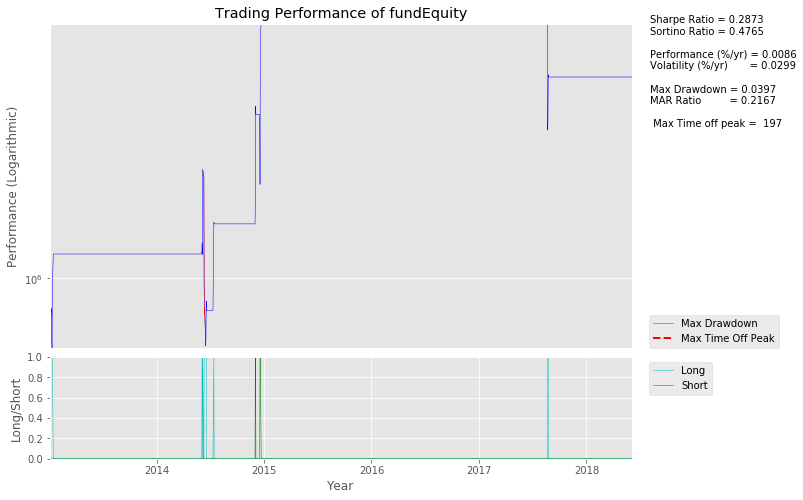

In [72]:
result = quantiacsToolbox.runts(myStrategy)